# 부제: 도메인 지식이 없어도 데이터만으로도 특성 파악하여 예측하기
- 특성 파악하는 방법
1. 결측치, 이상치 처리 / 기본통계분석 / 클래스 불균형 이해
2. 특성 분포 및 시각화:특성의 분포를 히스토그램이나 상자 그림 등을 사용(관계 이해를 위한 산점도)
3. 트리 기반 모델의 특성 중요도: DecisionTreeRegressor나 RandomForestRegressor와 같은 트리 기반 모델은 각 특성의 중요도
4. L1 정규화 (Lasso): L1 정규화를 사용한 선형 회귀 모델은 일부 특성의 가중치를 0으로 만들어 특성 선택을 자동
5. 다중회귀
6. 차원 축소 기법 적용: PCA 차원 축소 기법을 사용 데이터의 주성분을 분석하여 주요 특성
7. 재귀적 특성 제거 (RFE):모델을 훈련하고 가장 중요하지 않은 특성을 반복적으로 제거하여 최적의 특성을 선택하는 방법

In [48]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
padua_data = pd.read_csv('./data/kideny_PADUA_upload.csv')
renal_data = pd.read_csv('./data/kideny_RENAL_upload.csv')
treat_data = pd.read_csv('./data/kidney_treat_upload.csv')

In [56]:
treat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   serial  400 non-null    int64  
 1   RAIV_1  397 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


In [53]:
padua_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   serial                  400 non-null    int64  
 1   Tumor_PADUA             396 non-null    float64
 2   Exophytic_PADUA         395 non-null    float64
 3   Rim_PADUA               395 non-null    float64
 4   Sinus_PADUA             395 non-null    float64
 5   Polarlocation_PADUA     395 non-null    float64
 6   Collectingsystem_PADUA  395 non-null    float64
 7   PADUA_total             400 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 25.1 KB


In [54]:
renal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   serial           400 non-null    int64  
 1   Radius_RENAL     396 non-null    float64
 2   Exophytic_RENAL  395 non-null    float64
 3   Nearness_RENAL   395 non-null    float64
 4   APX_RENAL        394 non-null    float64
 5   Location_RENAL   395 non-null    float64
 6   RENAL_total      400 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 22.0 KB


In [50]:
merged_data = pd.merge(padua_data, renal_data, on='serial')
merged_data

,serial,Tumor_PADUA,Exophytic_PADUA,Rim_PADUA,Sinus_PADUA,Polarlocation_PADUA,Collectingsystem_PADUA,PADUA_total,Radius_RENAL,Exophytic_RENAL,Nearness_RENAL,APX_RENAL,Location_RENAL,RENAL_total
0,1,2.0,1.0,2.0,1.0,1.0,1.0,8,2.0,1.0,1.0,2.0,1.0,4
1,2,1.0,2.0,1.0,1.0,2.0,1.0,8,1.0,2.0,2.0,2.0,2.0,5
2,3,1.0,1.0,1.0,1.0,2.0,1.0,7,1.0,1.0,1.0,1.0,1.0,3
3,4,1.0,1.0,1.0,1.0,2.0,2.0,8,1.0,1.0,3.0,2.0,3.0,5
4,5,1.0,2.0,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,408,1.0,2.0,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4
396,409,1.0,2.0,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4
397,410,1.0,2.0,1.0,1.0,1.0,1.0,7,1.0,2.0,1.0,1.0,1.0,4
398,411,1.0,2.0,2.0,2.0,1.0,2.0,10,1.0,2.0,2.0,2.0,1.0,5


In [51]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   serial                  400 non-null    int64  
 1   Tumor_PADUA             396 non-null    float64
 2   Exophytic_PADUA         395 non-null    float64
 3   Rim_PADUA               395 non-null    float64
 4   Sinus_PADUA             395 non-null    float64
 5   Polarlocation_PADUA     395 non-null    float64
 6   Collectingsystem_PADUA  395 non-null    float64
 7   PADUA_total             400 non-null    int64  
 8   Radius_RENAL            396 non-null    float64
 9   Exophytic_RENAL         395 non-null    float64
 10  Nearness_RENAL          395 non-null    float64
 11  APX_RENAL               394 non-null    float64
 12  Location_RENAL          395 non-null    float64
 13  RENAL_total             400 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 43.

In [43]:
merged_data.drop(['Tumor_PADUA', 'Exophytic_PADUA'], axis=1, inplace=True)

In [44]:
merged_data.rename(columns={'Radius_RENAL': 'Radius_RENAL_PADUA'}, inplace=True)
merged_data.rename(columns={'Exophytic_RENAL': 'Exophytic_RENAL_PADUA'}, inplace=True)

In [45]:
merged_data_result = pd.merge(merged_data, treat_data, on='serial')

In [10]:
merged_data_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   serial                  400 non-null    int64  
 1   Rim_PADUA               395 non-null    float64
 2   Sinus_PADUA             395 non-null    float64
 3   Polarlocation_PADUA     395 non-null    float64
 4   Collectingsystem_PADUA  395 non-null    float64
 5   PADUA_total             400 non-null    int64  
 6   Radius_RENAL_PADUA      396 non-null    float64
 7   Exophytic_RENAL_PADUA   395 non-null    float64
 8   Nearness_RENAL          395 non-null    float64
 9   APX_RENAL               394 non-null    float64
 10  Location_RENAL          395 non-null    float64
 11  RENAL_total             400 non-null    int64  
 12  RAIV_1                  397 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 40.8 KB


## 결측치 제거

In [46]:
merged_data_result = merged_data_result.dropna()

In [47]:
merged_data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   serial                  389 non-null    int64  
 1   Rim_PADUA               389 non-null    float64
 2   Sinus_PADUA             389 non-null    float64
 3   Polarlocation_PADUA     389 non-null    float64
 4   Collectingsystem_PADUA  389 non-null    float64
 5   PADUA_total             389 non-null    int64  
 6   Radius_RENAL_PADUA      389 non-null    float64
 7   Exophytic_RENAL_PADUA   389 non-null    float64
 8   Nearness_RENAL          389 non-null    float64
 9   APX_RENAL               389 non-null    float64
 10  Location_RENAL          389 non-null    float64
 11  RENAL_total             389 non-null    int64  
 12  RAIV_1                  389 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 42.5 KB


In [12]:
merged_data_result.head()

,serial,Rim_PADUA,Sinus_PADUA,Polarlocation_PADUA,Collectingsystem_PADUA,PADUA_total,Radius_RENAL_PADUA,Exophytic_RENAL_PADUA,Nearness_RENAL,APX_RENAL,Location_RENAL,RENAL_total,RAIV_1
0,1,2.0,1.0,1.0,1.0,8,2.0,1.0,1.0,2.0,1.0,4,51.1
1,2,1.0,1.0,2.0,1.0,8,1.0,2.0,2.0,2.0,2.0,5,46.1
2,3,1.0,1.0,2.0,1.0,7,1.0,1.0,1.0,1.0,1.0,3,14.8
3,4,1.0,1.0,2.0,2.0,8,1.0,1.0,3.0,2.0,3.0,5,19.7
4,5,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4,14.8


In [13]:
merged_data_result.tail()

,serial,Rim_PADUA,Sinus_PADUA,Polarlocation_PADUA,Collectingsystem_PADUA,PADUA_total,Radius_RENAL_PADUA,Exophytic_RENAL_PADUA,Nearness_RENAL,APX_RENAL,Location_RENAL,RENAL_total,RAIV_1
395,408,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4,21.3
396,409,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4,30.5
397,410,1.0,1.0,1.0,1.0,7,1.0,2.0,1.0,1.0,1.0,4,70.7
398,411,2.0,2.0,1.0,2.0,10,1.0,2.0,2.0,2.0,1.0,5,12.6
399,412,1.0,1.0,2.0,1.0,7,1.0,1.0,1.0,1.0,3.0,3,11.8


In [14]:
# Raiv에 대한 histogram
import plotly.express as px

fig=px.histogram(merged_data_result, x='RAIV_1')
fig.show()

In [15]:
merged_data_result.describe()
# 데이터 분포이해

,serial,Rim_PADUA,Sinus_PADUA,Polarlocation_PADUA,Collectingsystem_PADUA,PADUA_total,Radius_RENAL_PADUA,Exophytic_RENAL_PADUA,Nearness_RENAL,APX_RENAL,Location_RENAL,RENAL_total,RAIV_1
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,202.228792,1.354756,1.318766,1.398458,1.311054,8.460154,1.208226,1.868895,1.920308,1.557841,1.799486,4.989717,27.196144
std,116.730333,0.479055,0.466598,0.490211,0.485253,1.682714,0.471162,0.718521,0.906064,0.497283,0.806481,1.428682,24.330815
min,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.500000
25%,104.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,10.800000
50%,202.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,19.000000
75%,299.000000,2.000000,2.000000,2.000000,2.000000,9.000000,1.000000,2.000000,3.000000,2.000000,2.000000,6.000000,35.100000
max,412.000000,2.000000,2.000000,2.000000,3.000000,13.000000,3.000000,3.000000,3.000000,2.000000,3.000000,8.000000,154.800000


In [16]:
# 이상치 제거(강의자료 15 인디언 당뇨병 예측 참고)

# 상관관계

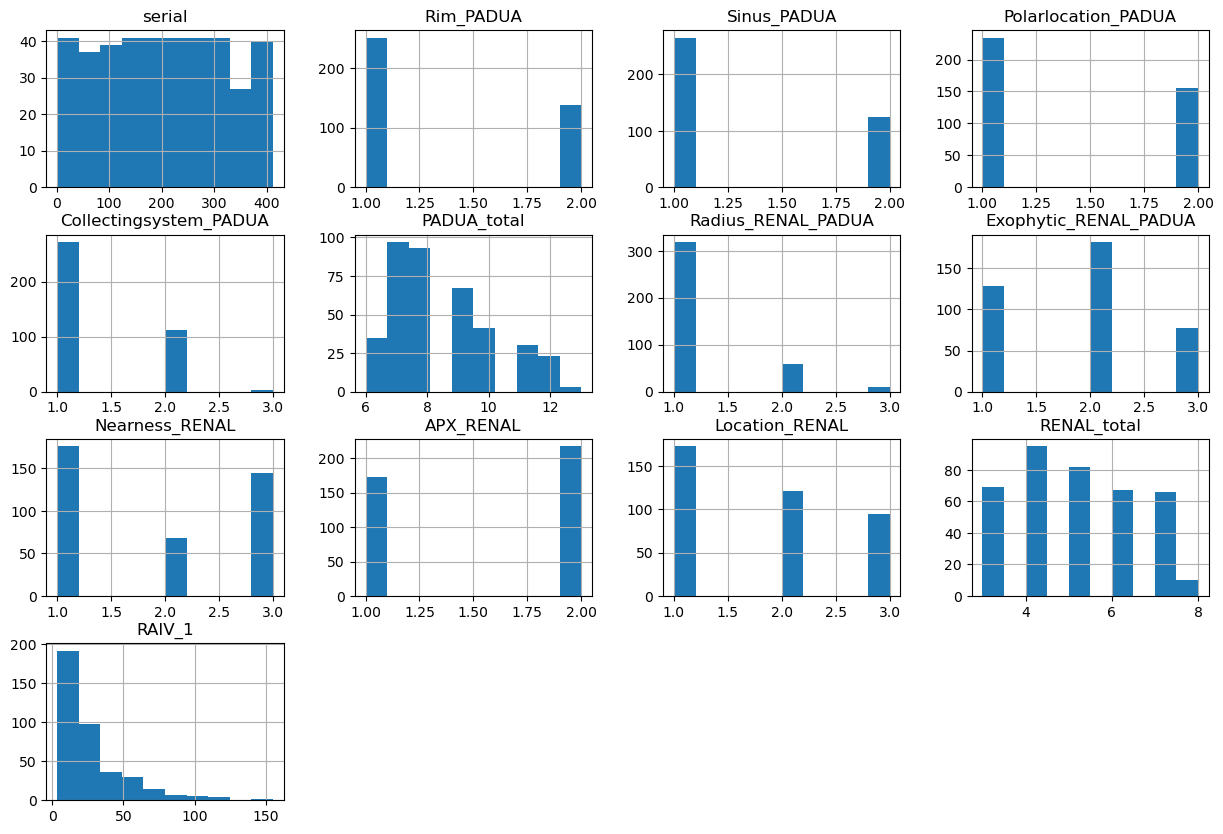

In [17]:
# 분포확인
merged_data_result.hist(bins=10, figsize=(15,10))
plt.show()

<Axes: >

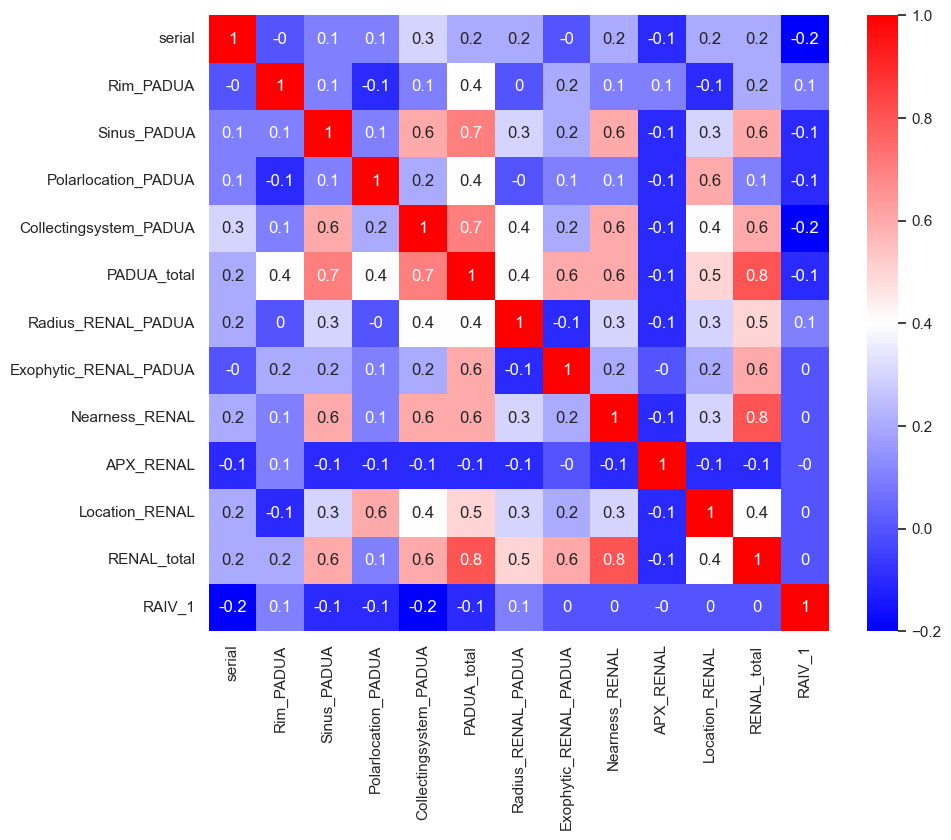

In [18]:
# corr() 함수이용해보기
corr = merged_data_result.corr().round(1)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr, annot=True, cmap='bwr')

In [19]:
# plt.figure(figsize=(12,6))
# sns.pairplot(data=merged_data_result);

# 데이터나누기

In [20]:
from sklearn.model_selection import train_test_split

X = merged_data_result.drop('RAIV_1', axis=1)  # 'RAIV_1' 열을 제외한 모든 열 선택
y = merged_data_result['RAIV_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# y값 뷸균형 확인하기
import plotly.express as px

fig=px.histogram(y_train, x='RAIV_1')
fig.show()

In [38]:
# y값 뷸균형 확인하기
import plotly.express as px

fig=px.histogram(y_test, x='RAIV_1')
fig.show()

In [22]:
from sklearn.ensemble import (AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

models=[]
models.append(('AdaBoostRegressor',AdaBoostRegressor()))
models.append(('GradientBoostingRegressor',GradientBoostingRegressor()))
models.append(('RandomForestRegressor',RandomForestRegressor()))
models.append(('DecisionTreeRegressor',DecisionTreeRegressor()))
models.append(('XGBoostRegressor', XGBRegressor()))

In [23]:
from sklearn.metrics import r2_score, mean_squared_error

tr_result_r2 = []
test__result_r2 = []
tr_result_mse = []
test_result_mse = []
names = []

for name, model in models:
    # 모델 훈련
    model.fit(X_train, y_train)

    # 예측
    pred_tr = model.predict(X_train)
    pred_test = model.predict(X_test)

    # R^2 계산
    r2_tr = r2_score(y_train, pred_tr)
    r2_test = r2_score(y_test, pred_test)
    tr_result_r2.append(r2_tr)
    test__result_r2.append(r2_test)

    # Mean Squared Error 계산
    mse_tr = mean_squared_error(y_train, pred_tr)
    mse_test = mean_squared_error(y_test, pred_test)
    tr_result_mse.append(mse_tr)
    test_result_mse.append(mse_test)

    names.append(name)

result_pd = pd.DataFrame({
    'Model':names,
    'train R^2':tr_result_r2,
    'test R^2': test__result_r2,
    'train MSE':tr_result_mse,
    'test MSE':test_result_mse
})
result_pd

,Model,train R^2,test R^2,train MSE,test MSE
0,AdaBoostRegressor,0.413328,0.094668,352.875241,492.816752
1,GradientBoostingRegressor,0.839133,0.168241,96.759476,452.767643
2,RandomForestRegressor,0.893151,0.285803,64.268249,388.772608
3,DecisionTreeRegressor,1.000000,-0.468565,0.000000,799.412179
4,XGBoostRegressor,0.999016,-0.157997,0.591970,630.354838


In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

results_r2 = []
results_mse = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)

    # R^2 계산
    cv_results_r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results_r2.append(cv_results_r2)
    
    # mean_squared_error는 값이 낮을수록 더 좋은 모델이므로 음수로 변환하여 사용
    cv_results_mse = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    cv_results_mse = -cv_results_mse
    results_mse.append(cv_results_mse)

    names.append(name)

# DataFrame 생성
result_pd = pd.DataFrame({
    'Model': names,
    'Mean R^2': [round(result.mean(), 4) for result in results_r2],
    'Std R^2': [round(result.std(), 4) for result in results_r2],
    'Mean MSE': [round(result.mean(), 4) for result in results_mse],
    'Std MSE': [round(result.std(), 4) for result in results_mse]
})

result_pd

,Model,Mean R^2,Std R^2,Mean MSE,Std MSE
0,AdaBoostRegressor,0.0092,0.2750,504.5872,126.5130
1,GradientBoostingRegressor,0.1454,0.1744,470.8455,163.2100
2,RandomForestRegressor,0.1414,0.2270,453.3818,120.9824
3,DecisionTreeRegressor,-0.2767,0.5688,646.4174,136.0366
4,XGBoostRegressor,-0.0359,0.3632,530.6130,112.7307


- R^2 : 0~1 사이의 값으로 높을수록 좋음(음수값은 그 모델 적용이 어렵다는 뜻)
- MSE : 낮은값일수록 좋음
- 평가 지표는 R^2 (결정 계수)이며, 이 값은 모델이 주어진 데이터에 얼마나 잘 적합되었는지를 측정하는 지표입니다. R^2 값은 0과 1 사이의 범위에 있으며, 높을수록 모델이 데이터를 잘 설명한다는 것을 나타냄
- MSE는 작을수록 모델의 예측이 더 좋다는 것을 의미

### RandomForestRegressor() 모델 활용해서 성능 확인

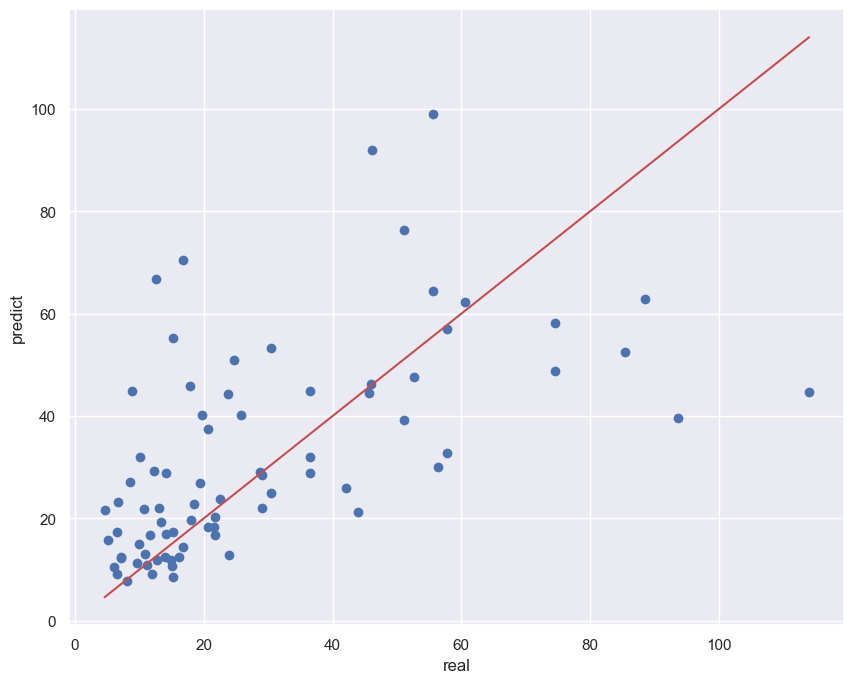

In [25]:
# 성능 확인

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('real')
plt.ylabel('predict')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r') 
plt.show()
# 값들이 빨간선 주위에 오는것이 좋음

# 군집 이용

In [26]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

cluster_range = range(2, 11)

optimal_clusters = 0
max_silhouette_score = -1

for n_clusters in cluster_range:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    kmeans.fit(X_train)
    
    clusters = kmeans.predict(X_train)
    
    silhouette_avg = silhouette_score(X_train, clusters)
    
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_clusters = n_clusters

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_clusters)

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

Exception in thread Thread-6:
Traceback (most recent call last):
  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\subprocess.py", line 1386, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 24: invalid start byte
c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\joblib\externals\loky\back

Optimal number of clusters: 2


In [27]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# 학습된 모델을 이용하여 train 데이터에 대한 군집 레이블 예측
train_cluster_labels = kmeans.predict(X_train)

# 학습된 모델을 이용하여 test 데이터에 대한 군집 레이블 예측
test_cluster_labels = kmeans.predict(X_test)

print('train_cluster_labels :', train_cluster_labels)
print('test_cluster_labels : ', test_cluster_labels)

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



train_cluster_labels : [0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0
 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0
 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0
 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0]
test_cluster_labels :  [1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1]


In [28]:
X_tr_1 = X_train[train_cluster_labels == 1]
X_test_1 = X_test[test_cluster_labels == 1]
y_tr_1 = y_train[train_cluster_labels == 1]
y_test_1 = y_test[test_cluster_labels == 1]

X_tr_0 = X_train[train_cluster_labels == 0]
X_test_0 = X_test[test_cluster_labels == 0]
y_tr_0 = y_train[train_cluster_labels == 0]
y_test_0 = y_test[test_cluster_labels == 0]

In [ ]:
# y값 뷸균형 확인하기
import plotly.express as px

fig=px.histogram(y_train, x='RAIV_1')
fig.show()

In [ ]:
# y값 뷸균형 확인하기
import plotly.express as px

fig=px.histogram(y_train, x='RAIV_1')
fig.show()

---

## 군집0

In [29]:
from sklearn.ensemble import (AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

models=[]
models.append(('AdaBoostRegressor',AdaBoostRegressor()))
models.append(('GradientBoostingRegressor',GradientBoostingRegressor()))
models.append(('RandomForestRegressor',RandomForestRegressor()))
models.append(('DecisionTreeRegressor',DecisionTreeRegressor()))
models.append(('XGBoostRegressor', XGBRegressor()))

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

tr_result_r2 = []
test__result_r2 = []
tr_result_mse = []
test_result_mse = []
names = []

for name, model in models:
    # 모델 훈련
    model.fit(X_tr_0, y_tr_0)

    # 예측
    pred_tr = model.predict(X_tr_0)
    pred_test = model.predict(X_test_0)

    # R^2 계산
    r2_tr = r2_score(y_tr_0, pred_tr)
    r2_test = r2_score(y_test_0, pred_test)
    tr_result_r2.append(r2_tr)
    test__result_r2.append(r2_test)

    # Mean Squared Error 계산
    mse_tr = mean_squared_error(y_tr_0, pred_tr)
    mse_test = mean_squared_error(y_test_0, pred_test)
    tr_result_mse.append(mse_tr)
    test_result_mse.append(mse_test)

    names.append(name)

result_pd = pd.DataFrame({
    'Model':names,
    'train R^2':tr_result_r2,
    'test R^2': test__result_r2,
    'train MSE':tr_result_mse,
    'test MSE':test_result_mse
})
result_pd

,Model,train R^2,test R^2,train MSE,test MSE
0,AdaBoostRegressor,0.648500,0.167762,246.678695,562.272435
1,GradientBoostingRegressor,0.915489,0.246886,59.309030,508.814452
2,RandomForestRegressor,0.891356,0.285621,76.245173,482.644747
3,DecisionTreeRegressor,1.000000,-0.587946,0.000000,1072.839583
4,XGBoostRegressor,0.999986,-0.114602,0.009771,753.041096


- DecisionTreeRegressor 같은경우 규제를 주지 않아 과적합이 됨
### GradientBoostingRegressor() 모델 활용해서 성능 확인

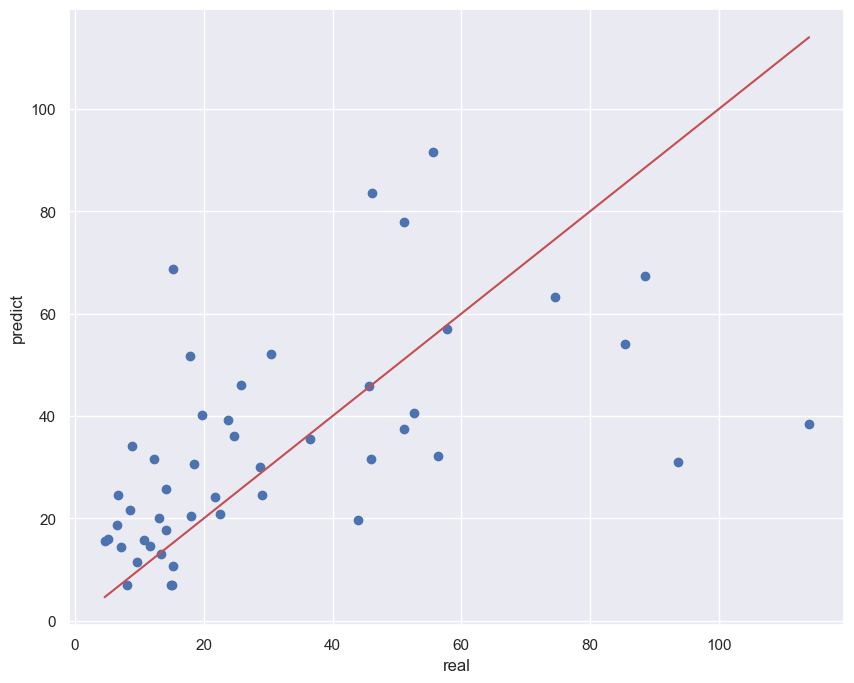

In [31]:
# 성능 확인

gb_model = GradientBoostingRegressor()
gb_model.fit(X_tr_0, y_tr_0)
predictions = gb_model.predict(X_test_0)

plt.scatter(y_test_0, predictions)
plt.xlabel('real')
plt.ylabel('predict')
plt.plot([min(y_test_0), max(y_test_0)], [min(y_test_0), max(y_test_0)], 'r') 
plt.show()
# 값들이 빨간선 주위에 오는것이 좋음

### 교차검증

In [32]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

results_r2 = []
results_mse = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)

    # R^2 계산
    cv_results_r2 = cross_val_score(model, X_tr_0, y_tr_0, cv=kfold, scoring='r2')
    results_r2.append(cv_results_r2)
    
    # mean_squared_error는 값이 낮을수록 더 좋은 모델이므로 음수로 변환하여 사용
    cv_results_mse = cross_val_score(model, X_tr_0, y_tr_0, cv=kfold, scoring='neg_mean_squared_error')
    cv_results_mse = -cv_results_mse
    results_mse.append(cv_results_mse)

    names.append(name)

# DataFrame 생성
result_pd = pd.DataFrame({
    'Model': names,
    'Mean R^2': [round(result.mean(), 4) for result in results_r2],
    'Std R^2': [round(result.std(), 4) for result in results_r2],
    'Mean MSE': [round(result.mean(), 4) for result in results_mse],
    'Std MSE': [round(result.std(), 4) for result in results_mse]
})

result_pd

,Model,Mean R^2,Std R^2,Mean MSE,Std MSE
0,AdaBoostRegressor,0.1408,0.2323,558.3395,350.8350
1,GradientBoostingRegressor,0.1250,0.2041,587.8487,381.1726
2,RandomForestRegressor,0.2129,0.1470,532.2157,339.1457
3,DecisionTreeRegressor,-0.1950,0.1587,732.5606,388.6084
4,XGBoostRegressor,-0.0001,0.2129,668.9236,437.5098


---

## 군집1

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

tr_result_r2 = []
test__result_r2 = []
tr_result_mse = []
test_result_mse = []
names = []

for name, model in models:
    # 모델 훈련
    model.fit(X_tr_1, y_tr_1)

    # 예측
    pred_tr = model.predict(X_tr_1)
    pred_test = model.predict(X_test_1)

    # R^2 계산
    r2_tr = r2_score(y_tr_1, pred_tr)
    r2_test = r2_score(y_test_1, pred_test)
    tr_result_r2.append(r2_tr)
    test__result_r2.append(r2_test)

    # Mean Squared Error 계산
    mse_tr = mean_squared_error(y_tr_1, pred_tr)
    mse_test = mean_squared_error(y_test_1, pred_test)
    tr_result_mse.append(mse_tr)
    test_result_mse.append(mse_test)

    names.append(name)

result_pd = pd.DataFrame({
    'Model':names,
    'train R^2':tr_result_r2,
    'test R^2': test__result_r2,
    'train MSE':tr_result_mse,
    'test MSE':test_result_mse
})
result_pd

,Model,train R^2,test R^2,train MSE,test MSE
0,AdaBoostRegressor,0.763183,-0.217040,115.523315,371.889604
1,GradientBoostingRegressor,0.925752,-0.434477,36.219231,438.331566
2,RandomForestRegressor,0.891803,0.170110,52.780486,253.588547
3,DecisionTreeRegressor,1.000000,-1.277880,0.000000,696.049333
4,XGBoostRegressor,0.999995,-0.116226,0.002351,341.084077


### XGBRegressor() 모델 활용해서 성능 확인

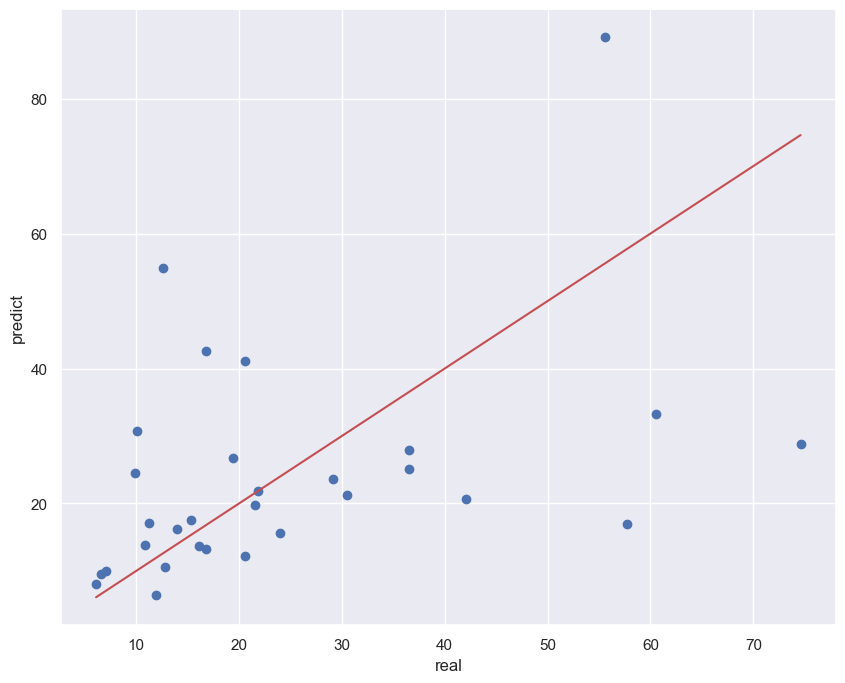

In [34]:
# 성능 확인

xg_model = XGBRegressor()
xg_model.fit(X_tr_1, y_tr_1)
predictions = xg_model.predict(X_test_1)

plt.scatter(y_test_1, predictions)
plt.xlabel('real')
plt.ylabel('predict')
plt.plot([min(y_test_1), max(y_test_1)], [min(y_test_1), max(y_test_1)], 'r') 
plt.show()
# 값들이 빨간선 주위에 오는것이 좋음

# 교차검증

In [35]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

results_r2 = []
results_mse = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)

    # R^2 계산
    cv_results_r2 = cross_val_score(model, X_tr_1, y_tr_1, cv=kfold, scoring='r2')
    results_r2.append(cv_results_r2)
    
    # mean_squared_error는 값이 낮을수록 더 좋은 모델이므로 음수로 변환하여 사용
    cv_results_mse = cross_val_score(model, X_tr_1, y_tr_1, cv=kfold, scoring='neg_mean_squared_error')
    cv_results_mse = -cv_results_mse
    results_mse.append(cv_results_mse)

    names.append(name)

# DataFrame 생성
result_pd = pd.DataFrame({
    'Model': names,
    'Mean R^2': [round(result.mean(), 4) for result in results_r2],
    'Std R^2': [round(result.std(), 4) for result in results_r2],
    'Mean MSE': [round(result.mean(), 4) for result in results_mse],
    'Std MSE': [round(result.std(), 4) for result in results_mse]
})

result_pd

,Model,Mean R^2,Std R^2,Mean MSE,Std MSE
0,AdaBoostRegressor,0.2703,0.3463,313.1903,142.8872
1,GradientBoostingRegressor,0.2133,0.2419,347.0283,168.5070
2,RandomForestRegressor,0.1645,0.4079,348.8610,134.3468
3,DecisionTreeRegressor,-0.2384,0.2000,585.9225,250.3310
4,XGBoostRegressor,0.1071,0.2684,381.1992,124.8137


In [36]:
# 데이터를 3개로 나눠도 될까?? 
# DecisionTreeRegressor, RandomForestRegressor으로 중요 특성 찾아 import statsmodels.api as sm /  lm = sm.OLS(y_train, X_train).fit()
# 그리드CV - best찾기 - 옵티마
# pipe라인
# 데이터 전처리
# 평가기준 def함수 
# 학습데이터 늘리기

# QnA하고 싶은것들 - 